# MULTIPLE REGRESSION ANALYSIS

Welcome to the world of multiple linear regressions. In this type of model, we try to model the relationship between a dependent variable and multiple independent variables. The more variables we add, the more complex processes we can model. However, there are additional steps that we must consider.

In this practice, we must suppose that the commercial department of a company wants to study the influence that advertising through different channels has on the number of sales of a product. A data set is available that contains the revenue (in millions) obtained from sales in 200 regions, as well as the budget amount, also in millions, for radio, television and newspaper advertisements in each of them.

<br>

## **Goal**
Create a **multiple regression model** that is capable of predicting the number of advertising **sales** given some independent variables.


## Assumptions of the Model

- A linear relationship between the dependent variables and the independent variables.
- Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
- Regression residuals must be normally distribuited.
- There is no heterocedasticity.
- No autocorrelation of the residuals.

# Import our libraries

The first thing we need to do is import the libraries we will be using in this project. To load, cleand or transform the data we will be using `Pandas` and `Numpy`. Also, `Matplotlib` and `Seaborn` will be useful to make different approachs and plots. To build our model we will be using the `sklearn` library, and the evaluation will be taking place with the `statsmodels` library. I've also added different more modules or libraries to use certain functions.

<br>

In [37]:
# Data treatment
#================================
import pandas as pd
import numpy as np

# Data visualization
#================================
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation
#================================
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as diag
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Model building
#================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


# Matplotlib settings
#================================
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titleweight'] = "bold"
plt.rcParams['font.family'] = 'serif' #Times New Roman
plt.rcParams['figure.dpi'] = 100

# Other
#================================
import warnings 
warnings.filterwarnings('ignore')




# Introducction to our data

- Load data
- NAN/NULL values
- Update headers

In [6]:
# Load the data with pandas
#================================
dataset = pd.read_csv("sales.txt", sep="\t", index_col=0)


# 1º Approach to the dataset
#================================
display(dataset.head())
print("-"*20)


# Null-Values
#================================
print(dataset.isnull().sum())


,newspaper,radio,tv,sales
0,69.2,37.8,230.1,22.1
1,45.1,39.3,44.5,10.4
2,69.3,45.9,17.2,9.3
3,58.5,41.3,151.5,18.5
4,58.4,10.8,180.8,12.9


--------------------
newspaper    0
radio        0
tv           0
sales        0
dtype: int64


In [7]:
# Rename columns
#================================

dataset = dataset.rename(columns={"newspaper": "Newspaper",
                                 "radio": "Radio",
                                 "tv": "Tv",
                                 "sales": "Sales"})

dataset

,Newspaper,Radio,Tv,Sales
0,69.2,37.8,230.1,22.1
1,45.1,39.3,44.5,10.4
2,69.3,45.9,17.2,9.3
3,58.5,41.3,151.5,18.5
4,58.4,10.8,180.8,12.9
...,...,...,...,...
195,13.8,3.7,38.2,7.6
196,8.1,4.9,94.2,9.7
197,6.4,9.3,177.0,12.8
198,66.2,42.0,283.6,25.5


# Relationship between variables

We must find certain correlation between our variable dependent (Sales) and our independent variables (Newspaper, Radio and Tv).

On the other hand, we need to know whether or not there is multicollinearity. Multicollinearity is where one of the explanatory variable is highly correlated with another explanatory variable. **In essence, one of the X variables is almost perfectly correlated with another or multiple X variables.**

,Newspaper,Radio,Tv,Sales
Newspaper,1.000,0.354,0.057,0.228
Radio,0.354,1.000,0.055,0.576
Tv,0.057,0.055,1.000,0.782
Sales,0.228,0.576,0.782,1.000


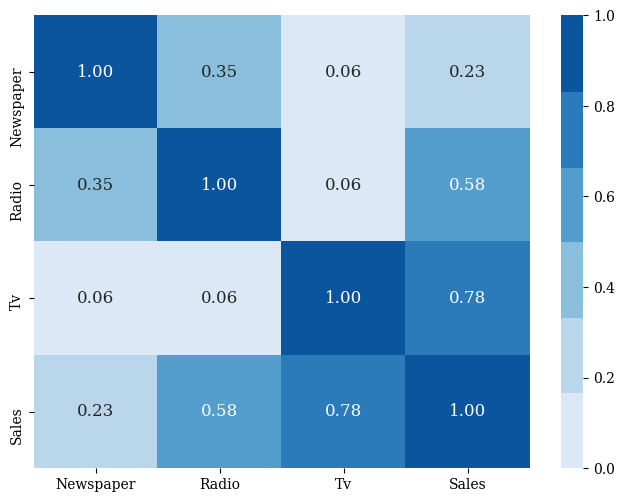

In [8]:
# Calculate the correlation matrix
#================================
corr_matrix = dataset.corr(method = "pearson")


# Display the correlation matrix
#================================
corr_matrix = corr_matrix.round(3)
display(corr_matrix)


# Plot the correlation heatmap
#================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=100)

sns.heatmap(corr_matrix.abs(),
            annot = True,
            vmin = 0,
            vmax = 1,
            center = 0.5,
            cmap = sns.color_palette("Blues"),
            ax = ax,
            annot_kws = {"size": 12},
            fmt= ".2f")

ax.tick_params(labelsize = 10)


Looking at the heatmap along with the correlation matrix we can´t identify variables with highly correlation. However, we should be more sistematic in our aprroaching to remove highly correlated variables. One method, we can use is the `variance_inflation_factor` which **is a measure of how much a particularly variable is contribuiting to the standard error in the regression model.** 

A general recommendation is that if any of our variables come back with a **value of 5 or higher, then they should be removed from the model.**

## Variance Inflation Factor (VIF)

In [9]:
# Define dataframe without dependent variable
#================================
before = dataset.copy()
after = dataset.drop("Sales", axis=1)


# We need a constant
#================================
X1 = sm.add_constant(before)
X2 = sm.add_constant(after)

# Create the serie 
#================================
VIF_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])],
               index=(X1.columns))

VIF_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])],
               index=(X2.columns))


# Display the series
#================================

print("Data Before")
print("-"*50)
display(VIF_before)


print("Data After")
print("-"*50)
display(VIF_after)


Data Before
--------------------------------------------------


const        9.951155
Newspaper    1.145370
Radio        3.944974
Tv           6.521799
Sales        9.728633
dtype: float64

Data After
--------------------------------------------------


const        6.848900
Newspaper    1.145187
Radio        1.144952
Tv           1.004611
dtype: float64

**We can´t observe high values with our VIF** (not too much correlation) and that makes sense. Why? Because the correlation matrix doesn´t show any high correlation between the variables. If we'd had high values, then we should remove highly correlated variables and once we remove those metrics, recalculate the VIF.

## Check for a Linear Relationship

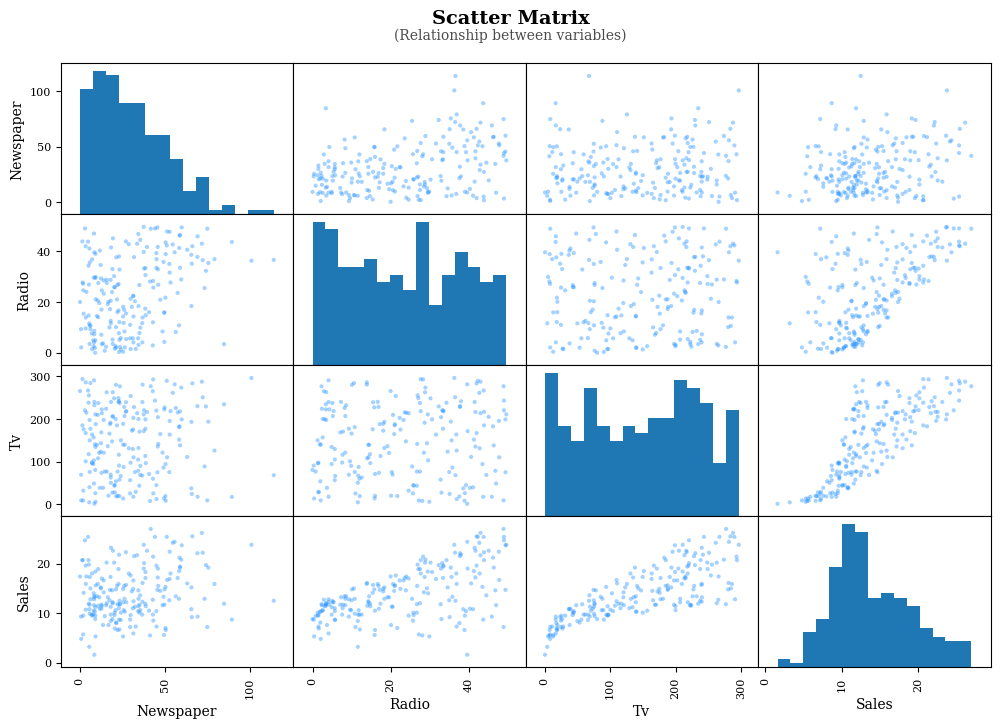

In [10]:
# Check the distribution of our data
#================================


fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
pd.plotting.scatter_matrix(frame = dataset,
                                alpha = 0.4,
                                diagonal = "hist",
                                color = "dodgerblue",
                                range_padding = 0.20,
                                hist_kwds={"bins":15},
                                ax = ax)


fig.text(x=0.5, y=0.93, s="Scatter Matrix",fontsize=14, fontweight="bold", ha="center")
fig.text(x=0.5, y=0.91, s="(Relationship between variables)", alpha=0.7, ha="center")

fig.subplots_adjust(top=0.88)



#  Describe the Data Set 

In this part, we should explore the data a little more and see how the data is distribuited and if there are any outliers. I will create a data frame with the basic statistics for each column of data.

I will be adding more metrics to the summary data frame. it includes a metric for three standard desviations both above and below of the mean.

In [11]:
desc = dataset.describe()

desc.loc["+3_std"] = (desc.loc["mean"] + desc.loc["std"]*3)
desc.loc["-3_std"] = (desc.loc["mean"] - desc.loc["std"]*3)

desc

,Newspaper,Radio,Tv,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,30.554000,23.264000,147.042500,14.022500
std,21.778621,14.846809,85.854236,5.217457
min,0.300000,0.000000,0.700000,1.600000
25%,12.750000,9.975000,74.375000,10.375000
50%,25.750000,22.900000,149.750000,12.900000
75%,45.100000,36.525000,218.825000,17.400000
max,114.000000,49.600000,296.400000,27.000000
+3_std,95.889863,67.804428,404.605209,29.674870
-3_std,-34.781863,-21.276428,-110.520209,-1.629870


We can observe certain points which are outside of our distribution. Depends on the situation, it could be a problem or not. Also, it's important to remove them if there are a mistake in the data collection, but if it isn't then probably you should keep them and test our model with and without them to see if they are influencing in your model.

Int64Index([16, 101], dtype='int64')

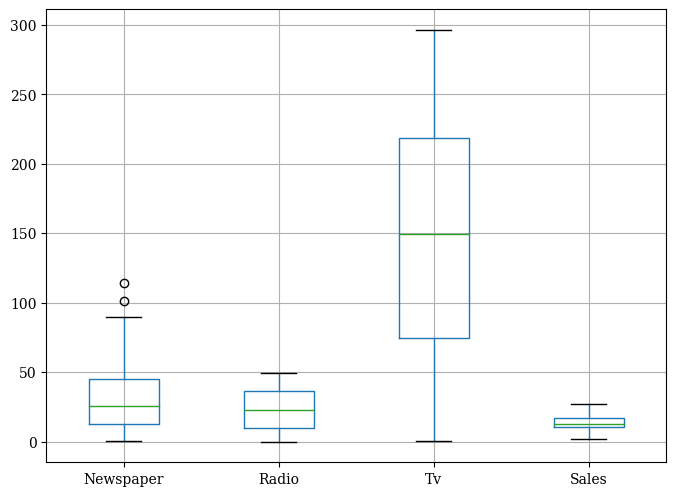

In [16]:
# Plot a boxplot to see outliers
#================================
dataset.boxplot(figsize=(8,6))

# Filtering outliers using zscore
#================================
dataset_remove = dataset[(np.abs(stats.zscore(dataset))<3).all(axis=1)]


# what rows were removed
#================================
dataset.index.difference(dataset_remove.index)


# Build the model

Once we have loaded, cleaned and explored the data we can proceed to the next part, **building the model**. The first thing we need to do is, define our explanatory variable and our exploratory variables. From here let's split the data into training and testing set. A healthy percentage is **20% testing and 80% training** but 30-70 is also ok.

In [18]:
# Define our input variables (x) and our output variable(y)
#================================
X = dataset.drop("Sales", axis=1)
Y = dataset[["Sales"]]


# Split the data 80/20
#================================
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


# Check the shape of the data
#================================
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(160, 3) (40, 3) (160, 1) (40, 1)


In [19]:
# Create the model 
#================================
model = LinearRegression()


# Fit the model with train data
#================================
model.fit(X_train, y_train)


# Make a prediction
#================================
y_pred = model.predict(X_test)

## Explore the output

With the data now fitted to the model, we can explore the output. The first thing we should do is look at the intercept of the model, and then we will print out each of the coefficientes of the model.

In [21]:
# Coefficient and Intercept of our model
#================================

intercept = model.intercept_[0]
coefficients = model.coef_[0]


print("Incercept: {:.3}".format(intercept))
print("--"*20)

for coef in zip(X.columns, coefficients):
    print("{}: {:.3}".format(coef[0], coef[1]))
    

Incercept: 2.91
----------------------------------------
Newspaper: 0.00259
Radio: 0.179
Tv: 0.0468


# Evaluating the model

To make the diagnostic easier, from this point forward, we will be using the statsmodel library. We now have a model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

- Regression residuals must be normally distribuited.
- There is no heterocedasticity.
- No autocorrelation of the residuals.

In [22]:
# Add a constant for our input
#================================
X2 = sm.add_constant(X)

# Create a OLS model
#================================
model_OLS = sm.OLS(Y, X2)

# Fit the data
#================================
est = model_OLS.fit()


## Confidence intervals

Let's look at our confidence intervals. Keep in mind that by default confidence intervals are calculated using 95% intervals. We interpret confidence intervals by saying if the population from which this sample was drawn was sampled 100 times. Approximately 95 of those confidence intervals would contain the "true" coefficient.

Why do we provide a confidence range? Well, it comes from the fact that we only have a sample of the population, not the entire population itself. Because of this, it means that the "true" coefficient could exist in the interval below or it couldn't, but we cannot say for sure. We provide some uncertainty by providing a range, usually 95%, where the coefficient is probably in.

- **Want a narrower range?** Decrease your confidence.
- **Want a wider range?** Increase your confidence.

In [25]:
# Estimates the confidence intervals
#================================

intervalos_ci = est.conf_int()
intervalos_ci.columns = ["2.5%", "97.5%"]

intervalos_ci

,2.5%,97.5%
const,2.323762,3.554016
Newspaper,-0.012616,0.010541
Radio,0.171547,0.205513
Tv,0.043014,0.048516


## Hypothesis Testing

With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.

- **Null Hypothesis**: There is no relationship between the exploratory variables and the explanatory variable.
- **Alternative Hypothesis**: There is a relationship between the exploratory variables and the explanatory variable.

- **If we reject the null**, we are saying there is a relationship, and the coefficients do not equal 0.
- **If we fail to reject the null**, we are saying there is no relationship, and the coefficients do equal 0

In [26]:
# Estimate the pvalues
#================================
est.pvalues

const        1.267295e-17
Newspaper    8.599151e-01
Radio        1.505339e-54
Tv           1.509960e-81
dtype: float64

In [27]:
# Remove insignificant variables
#================================
X2 = X.drop(columns="Newspaper")
X2 = sm.add_constant(X2)


# Create the model again
#================================
model_OLS = sm.OLS(Y, X2)


# Fit the model
#================================
est = model_OLS.fit()

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           4.83e-98
Time:                        09:36:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
Tv             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Diagnosis

In [17]:
# We take the residuals upside down
#=======================================

#true_train = np.array(y_train)
#true_train = true_train.flatten()
#pred_train = est.predict(exog=X2)

#resid_train = pred_train - true_train

In [28]:
# We take the predicted values from the train
#================================
pred_train = est.predict(exog=X2)

# We take residuals (y_train - pred_train)
#================================
res_train = est.resid


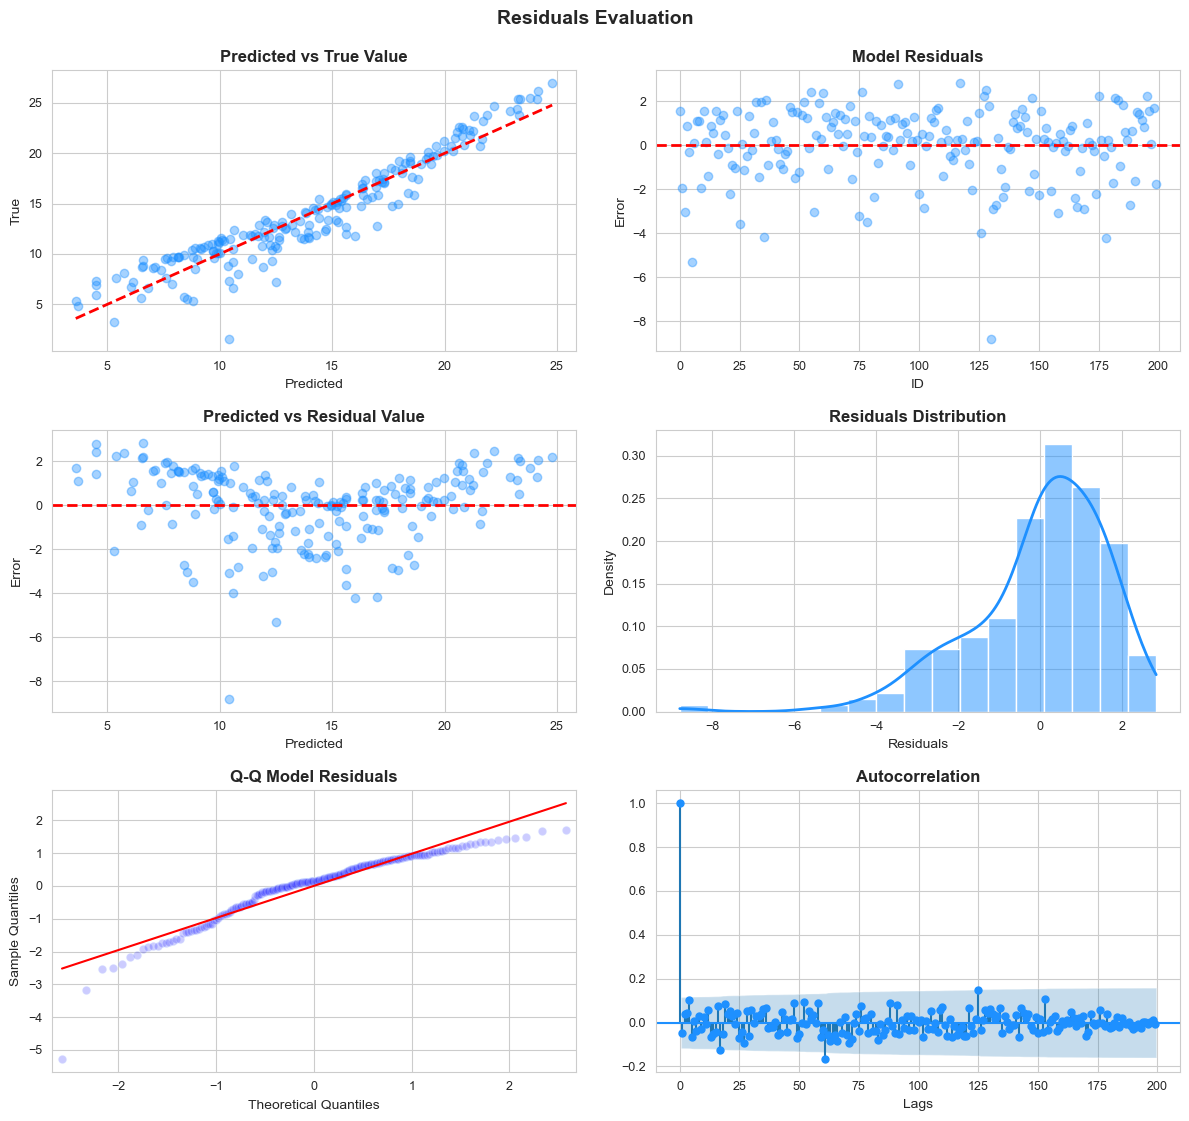

In [38]:
# Select a different style for this plots
#================================
sns.set_style("whitegrid")

# Residuals evaluation
#====================================

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12), dpi=100)


axes[0,0].plot([pred_train.min(), pred_train.max()], [pred_train.min(),pred_train.max()],
                "r--", lw=2)

axes[0,0].scatter(pred_train, Y, c="dodgerblue", alpha=0.4)

axes[0,0].set_title("Predicted vs True Value")
axes[0,0].set_xlabel("Predicted", fontsize=10)
axes[0,0].set_ylabel("True", fontsize=10)
axes[0,0].tick_params(labelsize=9)







axes[0,1].scatter(range(len(res_train)), res_train, c="dodgerblue", alpha=0.4)
axes[0,1].axhline(y=0, c="red", ls="--", lw=2)

axes[0,1].set_title('Model Residuals')
axes[0,1].set_xlabel('ID')
axes[0,1].set_ylabel('Error')
axes[0,1].tick_params(labelsize = 9)





axes[1,0].scatter(pred_train, res_train, alpha=0.4, c="dodgerblue")
axes[1,0].axhline(y=0, c="red", ls="--", lw=2)


axes[1,0].set_title("Predicted vs Residual Value")
axes[1,0].set_xlabel("Predicted", fontsize=10)
axes[1,0].set_ylabel("Error", fontsize=10)
axes[1,0].tick_params(labelsize=9)




sns.histplot(data=res_train,
              stat="density",
              kde=True,
              color="dodgerblue",
              line_kws={"lw": 2},
              ax=axes[1,1])

axes[1,1].set_title("Residuals Distribution")
axes[1,1].set_xlabel("Residuals", fontsize=10)
axes[1,1].tick_params(labelsize=9)

"""Otra forma si quisieara sería graficar sns.histplot (sin kde)
y añadir sns.kdeplot con lo que quiseramos, no necesario ahora porque lo que 
hacemos es simplificar nuestras gráficas

"""



sm.qqplot(data=res_train,
          fit=True,
          line="r",
          ax=axes[2,0],
          color="azure",
          alpha=0.2,
          lw=2)

axes[2,0].set_title("Q-Q Model Residuals")
axes[2,0].tick_params(labelsize=9)




sm.graphics.tsa.plot_acf(res_train,
                              lags=range(len(res_train)),
                              color="dodgerblue",
                              alpha=0.1,
                              ax=axes[2,1])

axes[2,1].set_title("Autocorrelation")
axes[2,1].set_xlabel('Lags')
axes[2,1].tick_params(labelsize=9)



fig.tight_layout(h_pad=2.0, w_pad=2.0)
fig.suptitle("Residuals Evaluation", fontsize=14, fontweight="bold", y=0.93)
fig.subplots_adjust(top=0.88)




Residuals don't seem to be distributed randomly around zero, without maintaining approximately the same variability along the X axis. This pattern points to a lack of homoscedasticity and a normal distribution.

### Normality Test

We are going to check normality using both the Shapiro-Wilk test and the Liliefors test (Modification of the Kolmogorov-Smirnov).

In both tests, the null hypothesis considers that the data follow a normal distribution, in this case, if the p-value is not lower than the selected alpha reference level, there is no evidence to rule out that the data is normally distributed.

- **H0: The data are normally distributed**
- **Ha: The data are not normal distribuited**



In [39]:
# Shapiro-Wilk test
#==============================
_, pval = stats.shapiro(est.resid)

# print the results of the test
if pval > 0.05:
    print("For the Shapiro Wilk Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so the data are normally distributed. \n")
    
else:
    print("For the Shapiro Wilk Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so the data are not normally distributed. \n")

print("-"*100)

# Liliefors test
#==============================
_, pval = diag.lilliefors(est.resid, dist="norm", pvalmethod="table")

# print the results of the test
if pval > 0.05:
    print("For the Liliefors Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so the data are normally distributed. \n")
    
else:
    print("For the Liliefors Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so the data are not normally distributed. \n")



For the Shapiro Wilk Test
The p-value was 4.19e-09
We reject the null hypthoesis, so the data are not normally distributed. 

----------------------------------------------------------------------------------------------------
For the Liliefors Test
The p-value was 0.001
We reject the null hypthoesis, so the data are not normally distributed. 



Both test show clear evidences to reject the hypothesis that the data are normally distribuited (p-value << 0.01).


### Measures of Error

We can examine how well our data fit the model, so we will take y_predictions and compare them to our y_actuals these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

- **Mean Absolute Error (MAE)**: Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).

- **Mean Squared Error (MSE)**: Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE)**: Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In [41]:
# calculate the mean squared error
#================================
model_mse = mean_squared_error(y_test, y_pred)


# calculate the mean absolute error
#================================
model_mae = mean_absolute_error(y_test, y_pred)


# calulcate the root mean squared error
#================================
model_rmse =  sqrt(model_mse)



print("MSE: {:.3}".format(model_mse))
print("MAE: {:.3}".format(model_mae))
print("RMSE: {:.3}".format(model_rmse))



MSE: 1.99
MAE: 1.04
RMSE: 1.41


## Create a summary of the Model Output

In [43]:
summary = est.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           4.83e-98
Time:                        09:45:32   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
Tv             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Output

Looking at the output, we now see that all of the independent variables are significant and even our constant is significant.  At this point, we can interpret our model and begin making predictions. Looking at the coefficents, we would say both radio an TV have a positive effect on Sales. 

Multiple Linear Regression Model

$$Sales = 2.95 + 0.18 (Radio) + 0.047 (Tv)$$
<br> 
It is able to **explain 89.6%** of the variance observed in sales (R-squared: 0.896, Adj. R-squared: 0.895). The F test is significant (p-value: 7.68e-78). So there is clear evidence that the model is able to explain the variance in sales better than expected by chance.

The normality conditions are not satisfied, so the estimated confidence intervals for the coefficients and predictions are not reliable.
    

# It's all by now!

## Session Information

In [44]:
from sinfo import sinfo

sinfo()

-----
matplotlib  3.3.2
numpy       1.19.2
pandas      1.1.5
scipy       1.5.2
seaborn     0.11.1
sinfo       0.3.1
sklearn     0.23.2
statsmodels 0.12.1
-----
IPython             7.19.0
jupyter_client      6.1.7
jupyter_core        4.7.0
jupyterlab          2.2.6
notebook            6.1.6
-----
Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
8 logical CPU cores, Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
-----
Session information updated at 2021-04-27 09:47
